# Montly Data
code for creating a dataset containing only montly values

In [2]:
import pandas as pd

df = pd.read_csv("../Data/daily_data.csv")
df.rename(columns={"Unnamed: 0": "datetime"}, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 2888 non-null   object 
 1   suction_tension (20cm)   2888 non-null   float64
 2   suction_tension (40cm)   2888 non-null   float64
 3   suction_tension (70cm)   2888 non-null   float64
 4   water_temperature        2888 non-null   float64
 5   barometric_pressure_qfe  2888 non-null   float64
 6   dew_point                2888 non-null   float64
 7   water_level              2888 non-null   float64
 8   inflow_linth (m3/s)      2888 non-null   float64
 9   outflow_limmat (m3/s)    2888 non-null   float64
 10  precipitation (mm)       2888 non-null   float64
 11  change_rate              2887 non-null   float64
 12  Evapotranspiration (mm)  2888 non-null   float64
dtypes: float64(12), object(1)
memory usage: 293.4+ KB


In [4]:
# convert DateTime column into datetime format
df["datetime"] = pd.to_datetime(df['datetime'])
# set DateTime as index
df.set_index("datetime", inplace=True)

In [5]:
# resampling dataframe to monthly data by subsetting original dataframe into dataframes where we have to take the sum and mean (depending on 
# the variable) of the daily data 
dfMS = df[["precipitation (mm)", "Evapotranspiration (mm)"]].resample("M").sum()

dfMM = df[['suction_tension (20cm)', 'suction_tension (40cm)',
       'suction_tension (70cm)', 'water_temperature',
       'barometric_pressure_qfe', 'dew_point',
       'water_level', "inflow_linth (m3/s)", "outflow_limmat (m3/s)"]].resample("M").mean()

In [6]:
dfMS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2012-01-31 to 2019-11-30
Freq: M
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   precipitation (mm)       95 non-null     float64
 1   Evapotranspiration (mm)  95 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [7]:
# merge the two datasets again 
dfM = pd.merge(dfMM, dfMS, on=dfMM.index)
# set datetime as index
dfM.set_index("key_0", inplace=True)
# change index name
dfM.index.names = ['datetime']
# create variable for change rate of water level since we didn´t want to use the one with hourly data and convert it to daily data
dfM["change_rate"] = dfM["water_level"].pct_change()
dfM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2012-01-31 to 2019-11-30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   95 non-null     float64
 1   suction_tension (40cm)   95 non-null     float64
 2   suction_tension (70cm)   95 non-null     float64
 3   water_temperature        95 non-null     float64
 4   barometric_pressure_qfe  95 non-null     float64
 5   dew_point                95 non-null     float64
 6   water_level              95 non-null     float64
 7   inflow_linth (m3/s)      95 non-null     float64
 8   outflow_limmat (m3/s)    95 non-null     float64
 9   precipitation (mm)       95 non-null     float64
 10  Evapotranspiration (mm)  95 non-null     float64
 11  change_rate              94 non-null     float64
dtypes: float64(12)
memory usage: 9.6 KB


In [8]:
dfM.to_csv("../Data/monthly_data.csv", index=True)

<AxesSubplot: xlabel='datetime'>

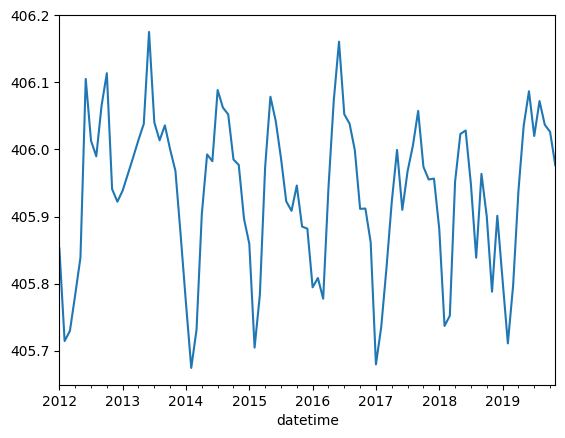

In [9]:
import matplotlib.pyplot as plt
dfM["water_level"].plot()